# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#3_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
    * [3.4.1 Data](#3.4.1_data)
    * [3.4.2 Summary data](#3.4.2_summary_data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Top COVID Countries by Summary Statistics](#3.5.1_Top_COVID_Countries_By_Summary_Statistics)
    * [3.5.2 Variable Correlation](#3.5.2_Variable_Correlation)
      * [3.5.2.1 Imputing Predictive Variables](#3.5.2.1_Imputing)
    * [3.5.3 Visualizing High Dimensional Data](#3.5.3_Visualizing_High_Dimensional_Data)
      * [3.5.3.1 Scale the data](#3.5.3.1_Scale_the_data)
        * [3.5.3.1.1 Verifying the scaling](#3.5.3.1.1_Verifying_the_scaling)
      * [3.5.3.2 Calculate the PCA transformation](#3.5.3.2_Calculate_the_PCA_transformation)  
      * [3.5.3.3 Adding day_number to scatter plot](#3.5.3.4_Adding_day_number_to_scatter_plot)  
    * [3.5.4 Visualizing Highest Impact Coefficients](#3.5.4_Coefficients)
  * [3.6 Summary](#3.6_Summary)


## 3.2 Introduction<a id='3.2_Introduction'></a>

At this point, we know our data science problem and have the data to help solve the problem.  

The data we are working with contains many predictive variables, however, some of these predictive variables have a number of missing values.  It is important to know if these are good predictors and if so, we may want to revisit the source of the data to try to find a source with a more complete set.  

From the predictive variables, we want to determine the day at which the number of infections reaches 1000.  This was selected because it provides a constant value which can be predicted, rather than a rate or current number of infections which will continuously change.  

The data science problem is to predict the day on which the number of COVID cases in a country meets or exceedes 1000.  

## 3.3 Imports<a id='3.3_Imports'></a>

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from pandas_profiling import ProfileReport
from datetime import datetime
from datetime import date

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

### 3.4.1 Data<a id='3.4.1_data'></a>

In [4]:
data = pd.read_csv('/Users/Hailey/JNote/Capstone2-PredictingCOVID/alldata_cleaned_downselected.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 50 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country                                             121 non-null    object 
 1   adult_anemia_2016                                   121 non-null    float64
 2   adult_blood_pressure_2015                           121 non-null    float64
 3   adult_diabetes_2014                                 121 non-null    float64
 4   adult_obesity_2016                                  121 non-null    float64
 5   adult_overweight_2016                               121 non-null    float64
 6   adult_sodium_2017                                   121 non-null    float64
 7   basic_sanitation_2017                               120 non-null    float64
 8   basic_water_2017                                    120 non-null    float64
 9  

In [6]:
data.head()

country  adult_anemia_2016  adult_blood_pressure_2015  \
0  Afghanistan          40.866667                     30.560   
1       Angola          48.566667                     29.590   
2    Argentina          21.766667                     22.615   
3    Australia          12.633333                     15.170   
4      Austria          19.633333                     20.985   

   adult_diabetes_2014  adult_obesity_2016  adult_overweight_2016  \
0               11.910               5.435                 22.885   
1                8.175               8.060                 27.185   
2                9.670              28.155                 62.750   
3                5.895              28.970                 64.500   
4                4.315              20.090                 54.295   

   adult_sodium_2017  basic_sanitation_2017  basic_water_2017  \
0           3.446667                  43.42             67.06   
1           3.163333                  49.88             55.84   
2           3.776667                    NaN               NaN   
3           3.350000                  24.35             99.97   
4           3.940000                   3.23              1.09   

   fruit_veg_availability_2013  ...  hiv_aids_deaths  \
0                       172.67  ...       271.336066   
1                       432.87  ...     14460.271530   
2                       398.31  ...      1726.551048   
3                       523.27  ...        74.468842   
4                       706.40  ...        39.353963   

   cardiovascular_diseases_deaths  hepatitis_deaths  \
0                    55101.310569        933.377917   
1                    21103.476719        413.642497   
2                   104685.644557        175.422649   
3                    50031.911474        103.499020   
4                    31086.540646          5.561523   

   lower_respiratory_infections_deaths  digestive_diseases_deaths  \
0                         21472.537569                5076.662867   
1                         14947.036196                8061.307177   
2                         31279.255082               14825.539424   
3                          4323.797195                5951.574556   
4                           937.949711                3182.001430   

   nutritional_deficiencies_deaths  economic_rating  macroeconomic_rating  \
0                      1443.990128              3.0                   3.5   
1                      4805.547327              NaN                   NaN   
2                      1060.850637              NaN                   NaN   
3                       118.094160              NaN                   NaN   
4                         8.633067              NaN                   NaN   

         date  cases_per_cap  
0  2020-03-27      97.477741  
1  2020-06-10       6.916165  
2  2020-03-20     794.632721  
3  2020-03-10      98.668121  
4  2020-03-08     285.171018  

[5 rows x 50 columns]

### 3.4.2 Summary data<a id='3.4.2_summary_data'></a>

In [6]:
profile = ProfileReport(data, title='Pandas Profiling Report', minimal = True) #, explorative=True)
profile.to_notebook_iframe()

A summary of the data is aquired using pandas_profiling.  Due to the large size of the dataset, the minimal action is called in order to reduce memory requirements during execution. 

From this report, we find that we have 121 observations, as expected, and that we do have some missing data (9.9%) which will need to be addressed by finding the data or determining that the data is not useful for this analysis.  We also see that all of our rows are unique, meaning we do not have repeat data for any country.  

Variables with interesting characteristics include:
* adult_obesity, retail, grocery, parks, transit, workplaces, residential, all diseases, cases_per_cap: all values are unique
* basic_sanitation, basic_water, limited_sanitation, limited_water, open_defecation, surface_water, unimproved_sanitation, unimproved_water: contains zeros (are these true zero or a null?)
* fruit_veg_avail, government_revenue, surface_water, undernourishment_prev: missing values
* nurses_and_midwives, open_defecation, physicians, safely_managed_sanitation, safely_managed_water, economic_rating, macroeconomic_rating: missing the majority of data (more than 1/3)
* date: high cardinality

## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

### 3.5.1 Top COVID Countries By Summary Statistics<a id='3.5.1_Top_COVID_Countries_By_Summary_Statistics'></a>

What does the incidence of COVID look like in each country?

In [7]:
covid_summary = data[['country', 'date', 'cases_per_cap']].set_index('country')

In [8]:
covid_summary.cases_per_cap.sort_values(ascending=False)#.head()

country
Qatar               4184.692313
Bahrain             2928.837256
Chile               2094.898590
Panama              2043.581105
Kuwait              1905.938379
                       ...     
Niger                  4.821763
Papua New Guinea       4.670178
Cambodia               1.629521
Vietnam                1.055700
Tanzania               0.848686
Name: cases_per_cap, Length: 121, dtype: float64

By number of cases per capita, Qatar has the highest number of cases at over 4k, followed by Bahrain, Chile, and Panama with a drop of 1200 or more.  Meanwhile, Cambodia, Vietnam, and Tanzania all have less than 2 cases per capita.  This is a significant range.  Does the date where these countries reached 100 follow a similar pattern?

In [9]:
data_sorted = covid_summary.date.sort_values(ascending=True)
data_sorted

country
S. Korea            2020-02-20
Japan               2020-02-22
Italy               2020-02-24
Germany             2020-02-29
France              2020-02-29
                       ...    
Namibia             2020-06-25
Botswana            2020-06-29
Barbados            2020-07-11
Papua New Guinea    2020-08-02
Belize              2020-08-06
Name: date, Length: 121, dtype: object

There is little overlap between the date that 100 cases was reached and the current cases per capita.  We will have to investigate further, but perhaps we need the date at which a higher number of cases occurred to find a good representation of the rate or maybe there are preventative factors that some countries took when they started seeing cases that other countries did not.  

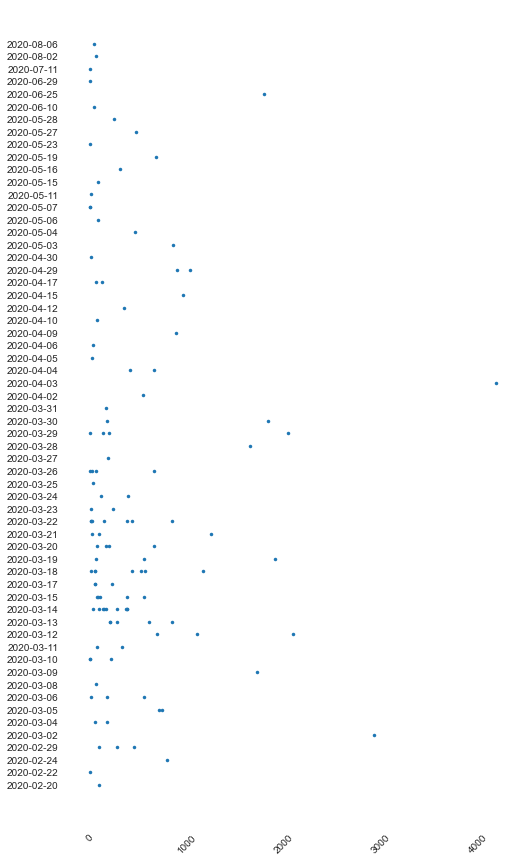

In [10]:
plt.figure(figsize=(8,15))
plt.plot(covid_summary.cases_per_cap, covid_summary.date.sort_values(ascending=True), marker = '.', linestyle = 'none')
plt.xticks(rotation=45);


Visually, it does not specifically appear that an earlier date of reaching 100 cases results in a higher number of cases per capita.  It is possible that there are groups in here that are making one trend difficult to see.  For example the first half of the months seem to have cases per capita increasing around the 20-something'th of March.  This could also be the "outliers" making it look that way for someone who is looking for some possible trend when there is no trend.  

While this seemed like it would be correlated and therefore provide some insight of a countries ultimate risk, it does not account for many other variables, like point of origin of the outbreak, mitigating strategies the country used, or initial risk of the population.  

Thus, we will move forward without this element.

Despite this not giving us the information that we thought it would, we did find something interesting in the scatterplot.  The majority of countries are below 100 cases per capita and there are only a handful countries between 1000-4000 cases per capita.  It would be interesting to see what is happening in these countries with an extremely high number of cases per capita.  We will remember to keep an eye on these moving forward. 

In [11]:
covid_summary[covid_summary.cases_per_cap >= 1000]

date  cases_per_cap
country                                
Bahrain       2020-03-10    2928.837256
Brazil        2020-03-13    1726.675640
Chile         2020-03-15    2094.898590
Colombia      2020-03-18    1102.981689
Israel        2020-03-12    1164.196273
Kuwait        2020-03-14    1905.938379
Luxembourg    2020-03-17    1249.121487
Oman          2020-03-26    1651.678663
Panama        2020-03-19    2043.581105
Peru          2020-03-17    1838.313842
Qatar         2020-03-11    4184.692313
South Africa  2020-03-18    1031.661156
USA           2020-03-04    1797.691306

### 3.5.2 Variable Correlation<a id='3.5.2_Variable_Correlation'></a>

We currently have an abundance of predictive varaibles that we need to examine to determine how well they will work for modeling.  Some of the predictive variables have inherent problems (missing values or other) so if these show a high linear relation, we may need to return to data wrangling.  

Having an initial idea of the data ranges and distributions will help us understand correlations in the data. 

Since we would like to predict how long it takes a country to reach a set number of cases, we need to convert our date column to the day of the year.  We will assume that COVID-19 started December 1st, 2019 based on the WHO timeline noting publications about "viral pnemonia" in Wuhan, China occurred late that month.  Thus, 31 days will be added to the determined day of the year that a country reached 100 cases. 

In [12]:
data.date =  pd.to_datetime(data.date)
data.date.head()

0   2020-03-27
1   2020-06-10
2   2020-03-20
3   2020-03-10
4   2020-03-08
Name: date, dtype: datetime64[ns]

In [14]:
date_entry = []
for date in data.date:
    date_entry.append(date.timetuple().tm_yday)
  
data['day_number'] = [x + 31 for x in date_entry]

We now have a value for the day of the year that COVID cases reached 100. 

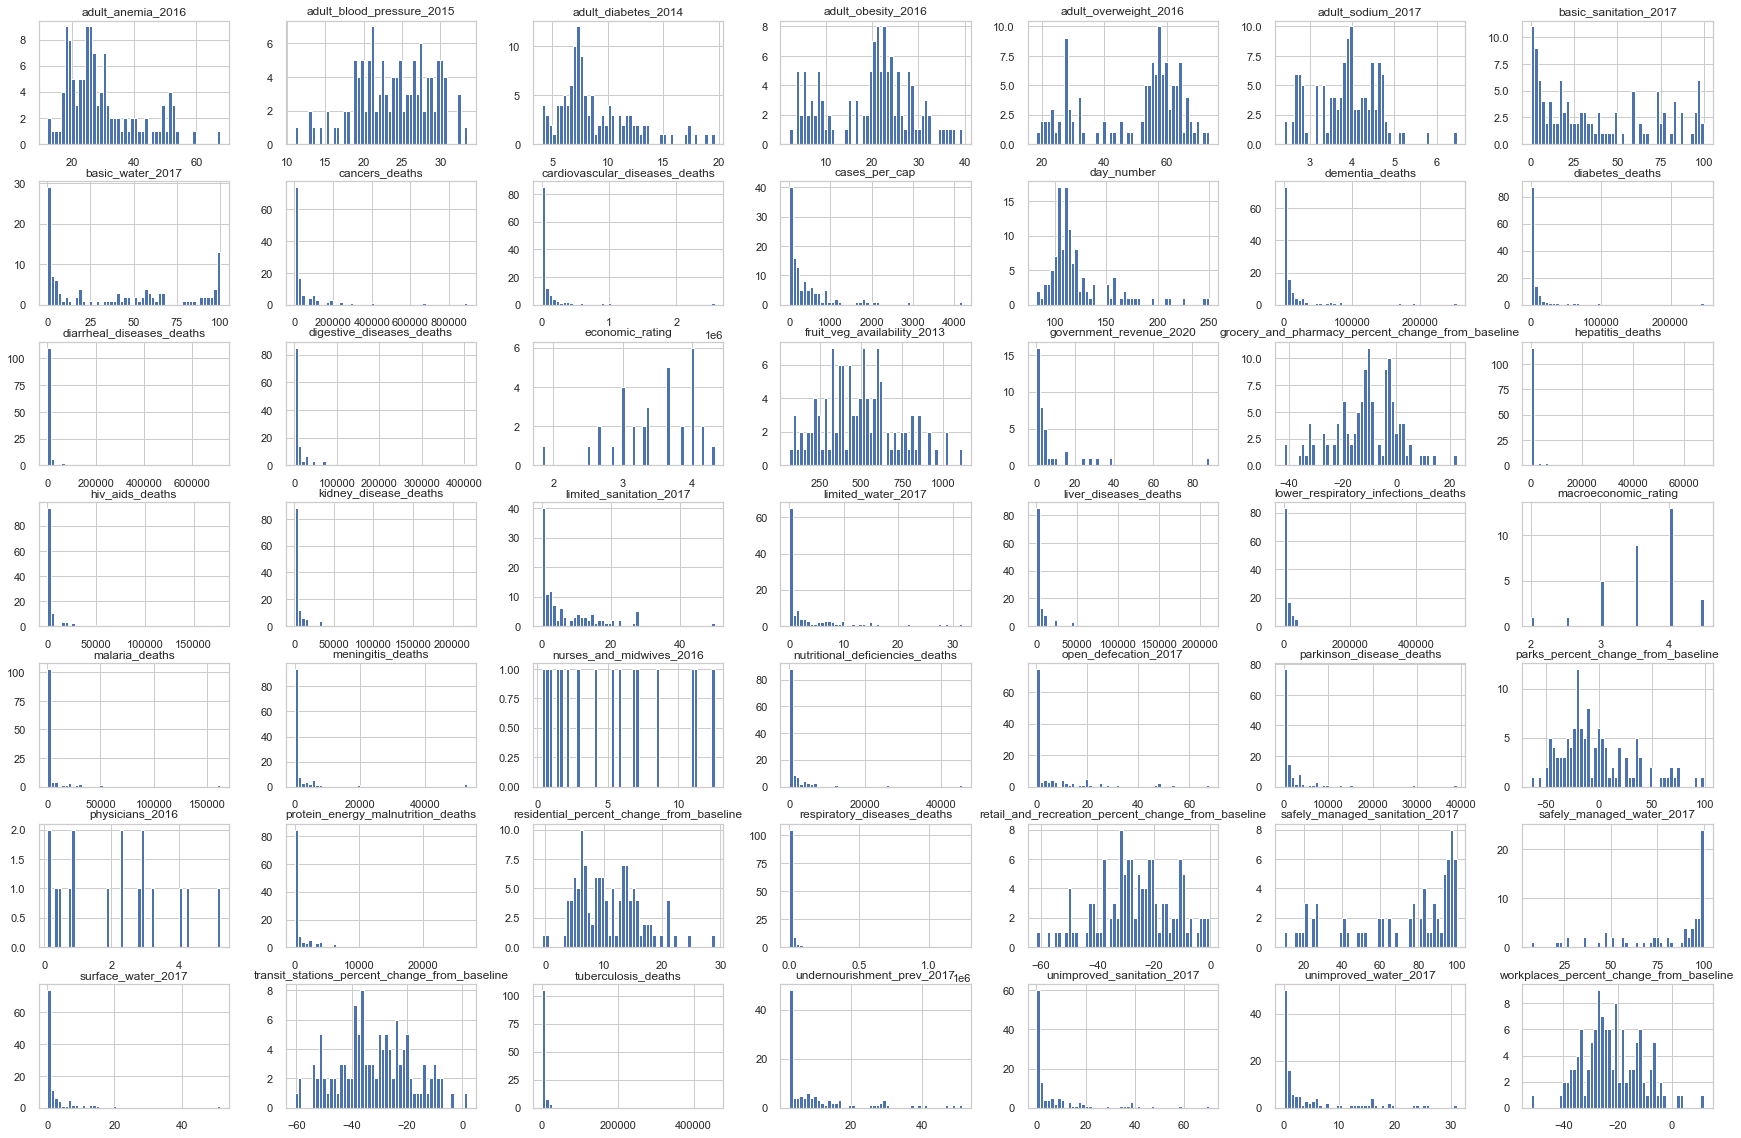

In [116]:
data.hist(bins=50, figsize = (30,20));

There are a few variables that are normal-ish.  There are also a few that appear bi-modal.  The majority of variables appear to have a large number of small values.  Given this data, applying a log plot would be helpful to see all the data.  

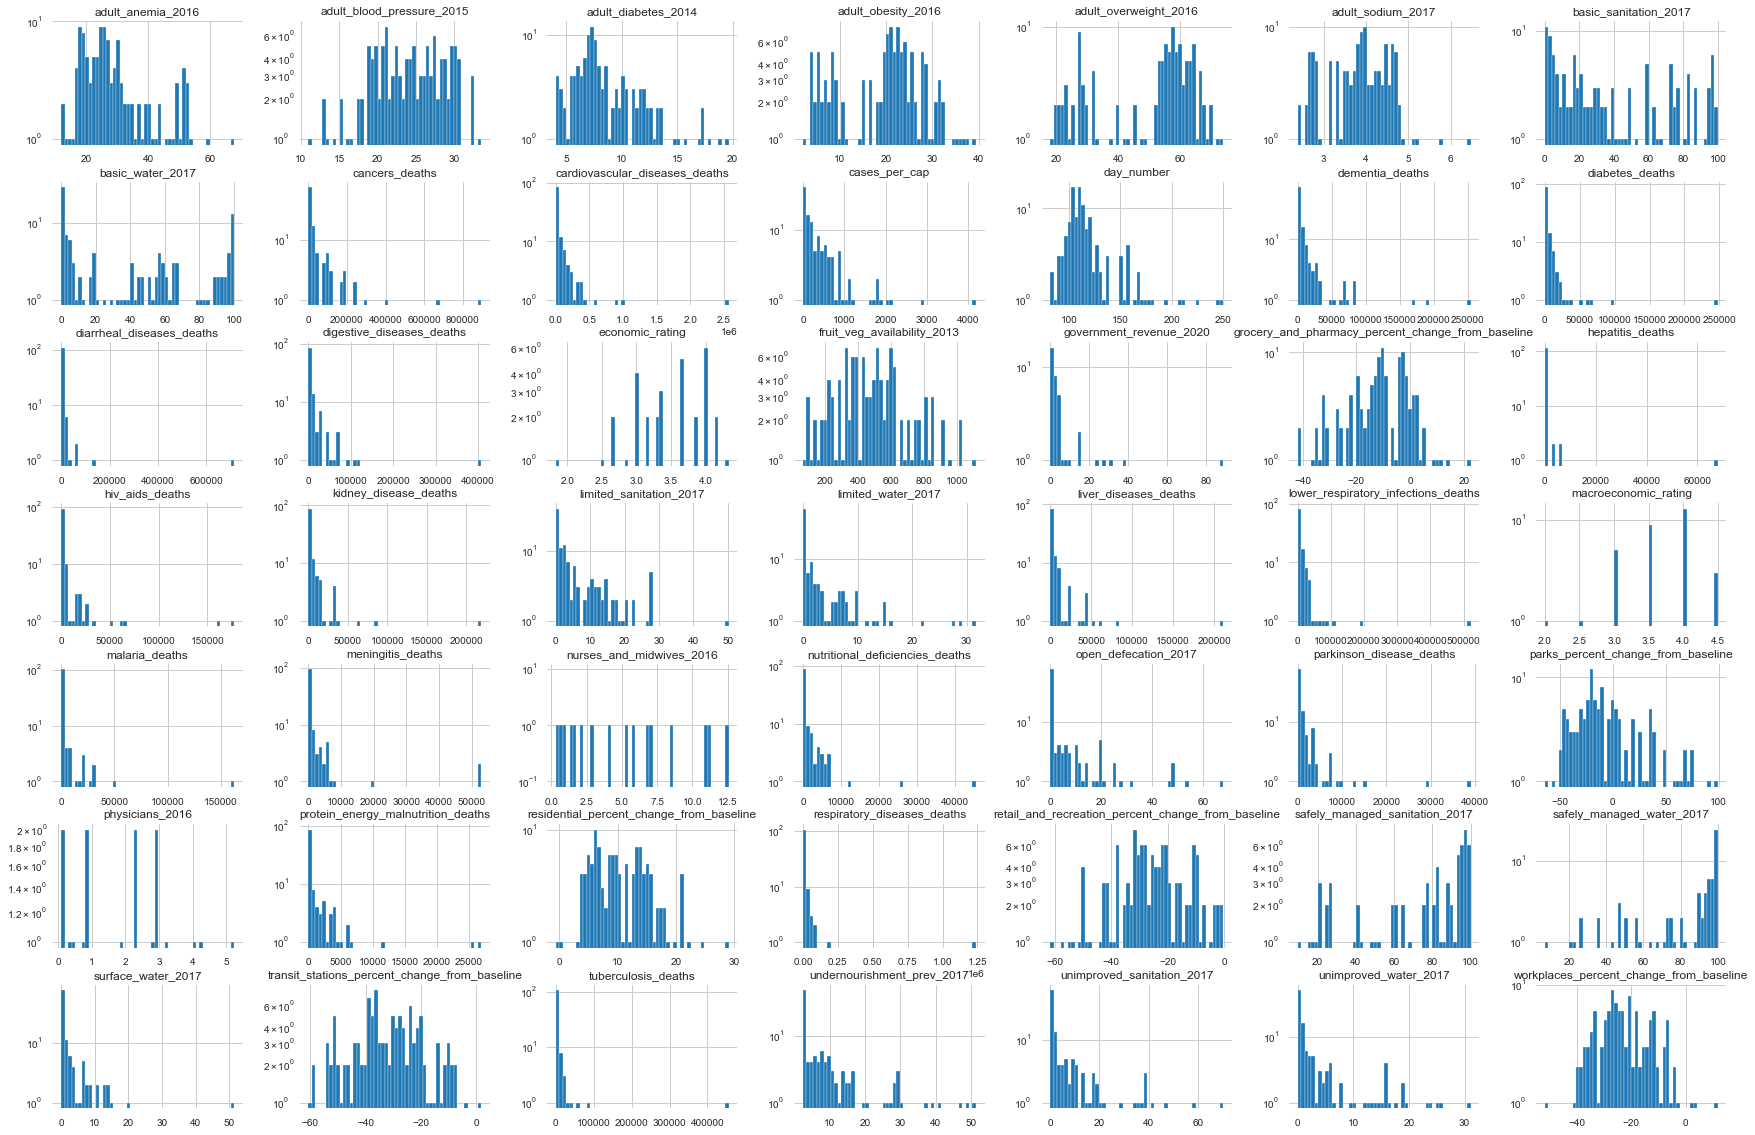

In [15]:
data.hist(bins=50, figsize = (30,20), log=True);

The log histograms give us a better visualization of the data.  There are still some bimodal, one-sided results, and residents percent change appears to be a 1/0 (T/F) indicator.  We'll keep these things in mind as we decide on our predictive variables.

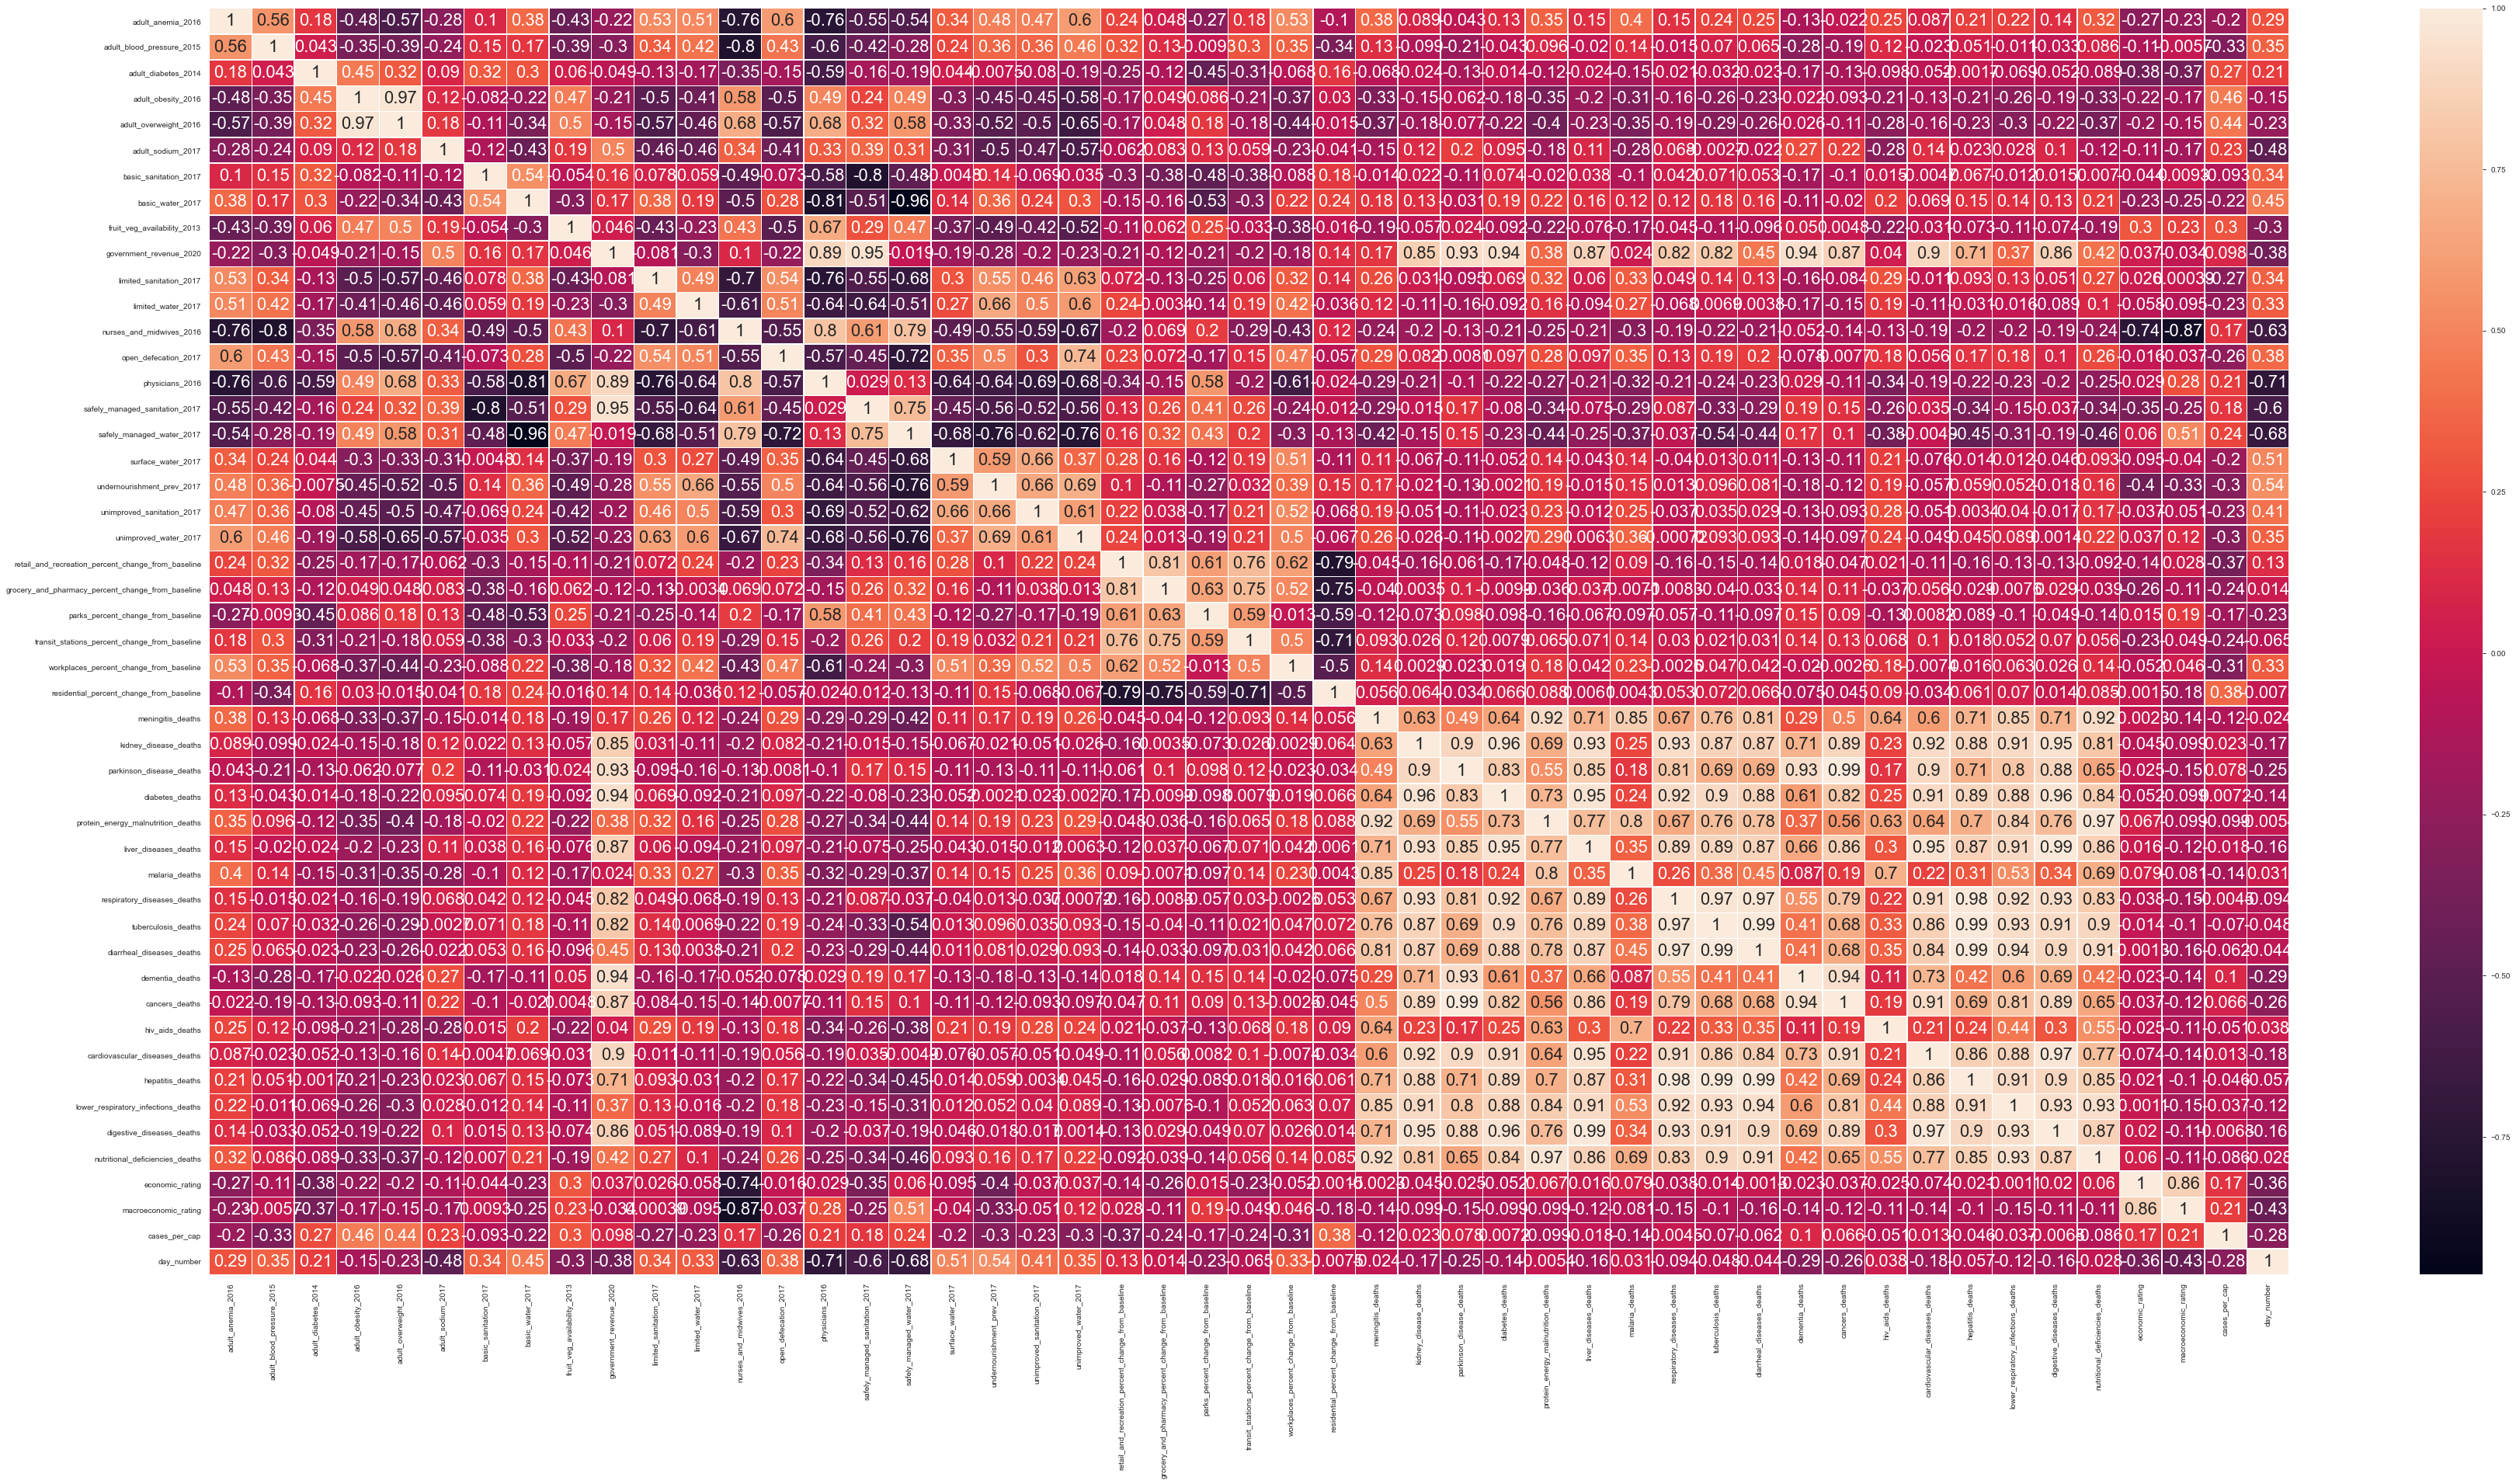

In [105]:
# Make a heatmap of the data 
plt.figure(figsize=(60,30)) # set the size of the heatmap so it is big enough to be useful
plt.rcParams.update({'font.size': 22})  # change the font so it is of readable size
sns.heatmap(data.corr(), annot=True, linewidths=0.5) # make the heatmap with seaborn

From the heatmap, we can immediately see some strong correlations with day number.  We can also see there are some additional variables that have a weak correlation.  

Let's downsize our data by removing some of the items with a weak linear relation (less than 0.25), along with the date column that we used to calculate day_number.  

I am surprised by the low correlation in the mobility datum, so let's take a look at that prior to removal.  

Text(0, 0.5, 'residential')

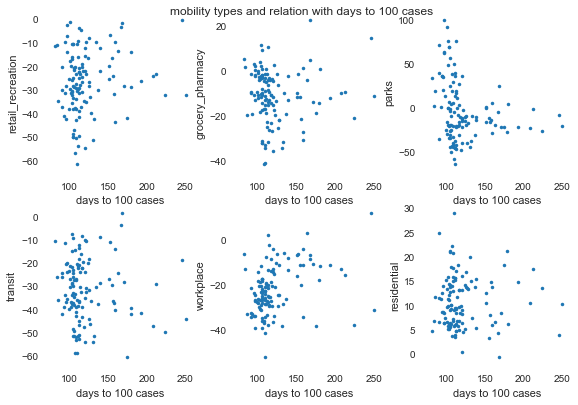

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=3)
fig.suptitle('mobility types and relation with days to 100 cases')
fig.tight_layout()

plt.subplot(2, 3, 1)
plt.plot(data.day_number, data.retail_and_recreation_percent_change_from_baseline, marker = '.', linestyle = 'none')
plt.xlabel('days to 100 cases')
plt.ylabel('retail_recreation')

plt.subplot(2, 3, 2)
plt.plot(data.day_number, data.grocery_and_pharmacy_percent_change_from_baseline, marker = '.', linestyle = 'none')
plt.xlabel('days to 100 cases')
plt.ylabel('grocery_pharmacy')

plt.subplot(2, 3, 3)
plt.plot(data.day_number, data.parks_percent_change_from_baseline, marker = '.', linestyle = 'none')
plt.xlabel('days to 100 cases')
plt.ylabel('parks')

plt.subplot(2, 3, 4)
plt.plot(data.day_number, data.transit_stations_percent_change_from_baseline, marker = '.', linestyle = 'none')
plt.xlabel('days to 100 cases')
plt.ylabel('transit')

plt.subplot(2, 3, 5)
plt.plot(data.day_number, data.workplaces_percent_change_from_baseline, marker = '.', linestyle = 'none')
plt.xlabel('days to 100 cases')
plt.ylabel('workplace')

plt.subplot(2, 3, 6)
plt.plot(data.day_number, data.residential_percent_change_from_baseline, marker = '.', linestyle = 'none')
plt.xlabel('days to 100 cases')
plt.ylabel('residential')

We can see that our mobility data is really all over the place with no real linear relation, so, while counterintuitive (since isolation should prevent spread), let's drop this info based on the correlation coefficient, for now.  

Interestingly, there is a higher correlation with the percent change in workplace and taking less time to get to 100 cases.  Again, this is counterintuitive since if there is not a change in social distancing then we should see more people get sick.  

Perhaps at the point where 100 cases per day occured, strategies had not been implemented widely.  Again, we may need to change the point we look at to a day with a higher number of cases.  

In [16]:
drop_list = ['date', 'adult_diabetes_2014', 'adult_obesity_2016', 'adult_overweight_2016',
                            'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline',
                            'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline',
                             'residential_percent_change_from_baseline', 'meningitis_deaths', 'kidney_disease_deaths', 'diabetes_deaths',
                             'protein_energy_malnutrition_deaths', 'liver_diseases_deaths', 'malaria_deaths', 'respiratory_diseases_deaths',
                             'tuberculosis_deaths', 'diarrheal_diseases_deaths', 'hiv_aids_deaths', 'cardiovascular_diseases_deaths', 
                             'hepatitis_deaths', 'lower_respiratory_infections_deaths', 'digestive_diseases_deaths', 
                             'nutritional_deficiencies_deaths']
down_data_bycorr = data.drop(drop_list, axis=1)

In [17]:
corr_matrix = down_data_bycorr.corr()
corr_matrix.day_number.sort_values(ascending = False)

day_number                                 1.000000
undernourishment_prev_2017                 0.542589
surface_water_2017                         0.506789
basic_water_2017                           0.449594
unimproved_sanitation_2017                 0.413377
open_defecation_2017                       0.384374
adult_blood_pressure_2015                  0.351870
unimproved_water_2017                      0.349986
limited_sanitation_2017                    0.341481
basic_sanitation_2017                      0.341414
workplaces_percent_change_from_baseline    0.332159
limited_water_2017                         0.329307
adult_anemia_2016                          0.294013
parkinson_disease_deaths                  -0.254703
cancers_deaths                            -0.259683
cases_per_cap                             -0.282837
dementia_deaths                           -0.289934
fruit_veg_availability_2013               -0.298015
economic_rating                           -0.359140
government_r

Now that we have downsampled our data based on linear relationships of the predictive variable with day_number (correlation values of remaining variables above), we can visualize pair wise for better understanding the relationships and outliers. 

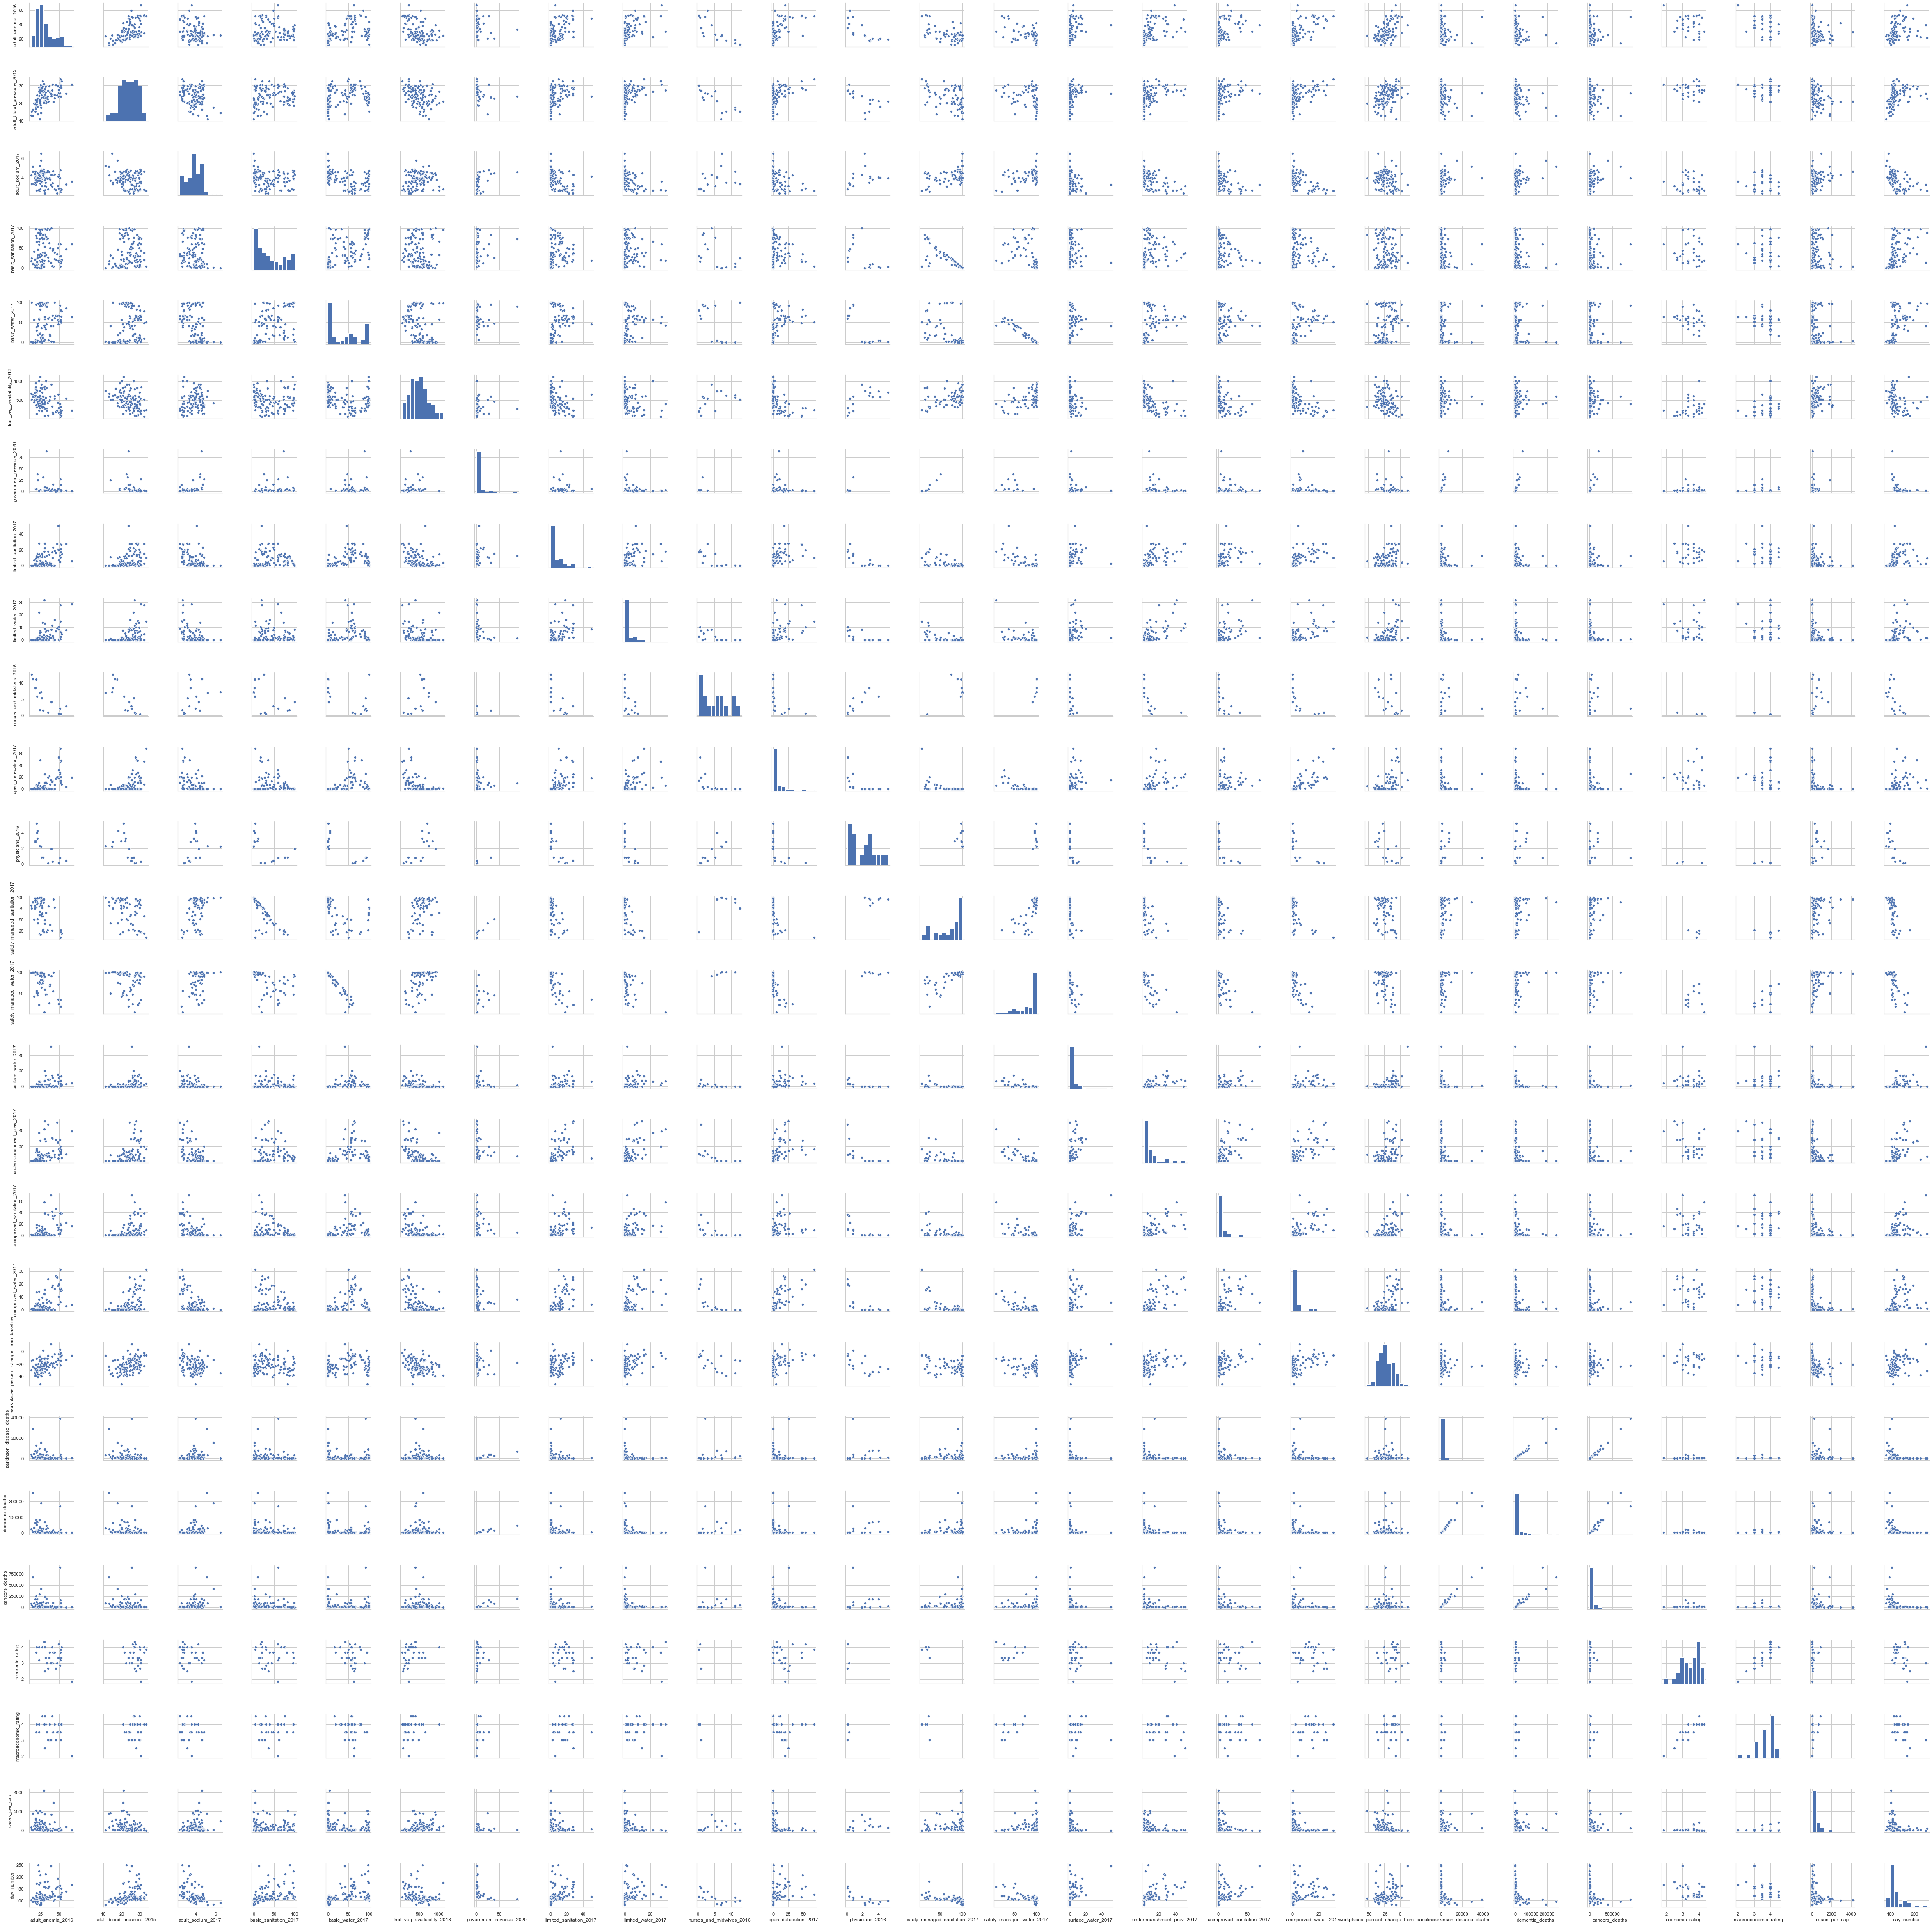

In [117]:
# Make a pairplot of the data
#sns.set(style = 'whitegrid')
#sns.pairplot(data)
sns.pairplot(down_data_bycorr) #, hue='day_number')

A few observations about the pairplot: 

- each cell represents the correlation that exists between two variables, we can get the corresponding value for the plot from the heatmap or a correlation table.  
- diagonally through the pairplot, histograms of the variables against themselves to show the distributions of that variable, providing a quick visualization of the shape of each variable's values.  
- plots with horizontal/vertical bands show discrete variables, like with the macroeconomic rating.  We wouldn't want to pursue regration analysis on such a variable.
- with some of the cleaner plots we can imagine a best fit line from the pattern, but others are more inscrutable.  

To look at some of these relationships more deeply, let's utilize the seaborn regplot to plot the data and a best fit line.


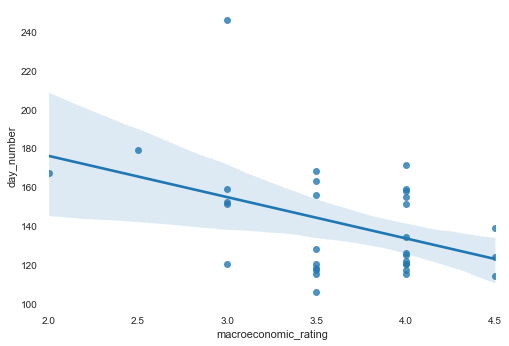

In [18]:
# Call the regplot method on your sns object
sns.regplot(data= down_data_bycorr, x='macroeconomic_rating', y = 'day_number')


Here we see the banding characteristic of a discrete variable.  This varaible could be used as a numerical or categorical.  In this case, it makes sense to use the numerical since these values are true numbers (i.e. 2 is a value not a representation of a state, like 2-Low Economic Standing) and the interval between values is meaningful.  If we had more data on macroeconomic ratings, we might get more meaningful information.

In [19]:
corr_matrix.day_number.sort_values(ascending = False)

day_number                                 1.000000
undernourishment_prev_2017                 0.542589
surface_water_2017                         0.506789
basic_water_2017                           0.449594
unimproved_sanitation_2017                 0.413377
open_defecation_2017                       0.384374
adult_blood_pressure_2015                  0.351870
unimproved_water_2017                      0.349986
limited_sanitation_2017                    0.341481
basic_sanitation_2017                      0.341414
workplaces_percent_change_from_baseline    0.332159
limited_water_2017                         0.329307
adult_anemia_2016                          0.294013
parkinson_disease_deaths                  -0.254703
cancers_deaths                            -0.259683
cases_per_cap                             -0.282837
dementia_deaths                           -0.289934
fruit_veg_availability_2013               -0.298015
economic_rating                           -0.359140
government_r

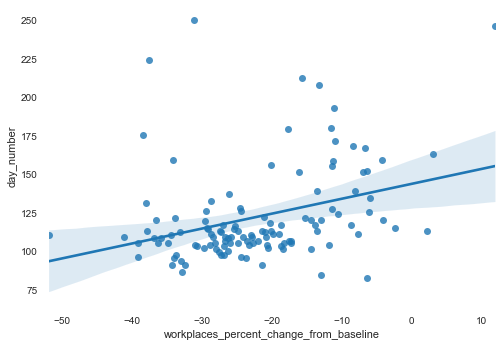

In [20]:
sns.regplot(data= down_data_bycorr, x='workplaces_percent_change_from_baseline', y = 'day_number');

This is one of our weaker linear relations.  This is surprising since reducing mobility should reduce the spread of COVID-19.  There was no relation with other mobility indicators and a weak correlation here.  Perhaps at 100 cases per day the testing information was not good enough to provide representative information or mobility factors had not yet been implemented and therefore had no effect.  

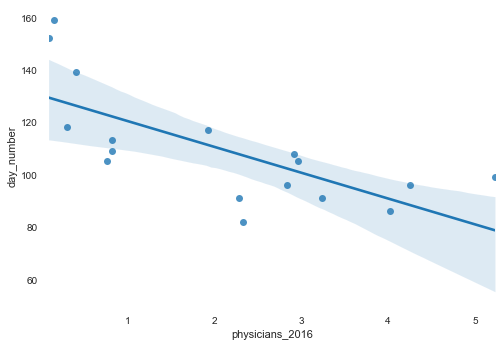

In [21]:
sns.regplot(data= down_data_bycorr, x='physicians_2016', y = 'day_number');

One of our strongest relations unfortunately does not include all of the data. 

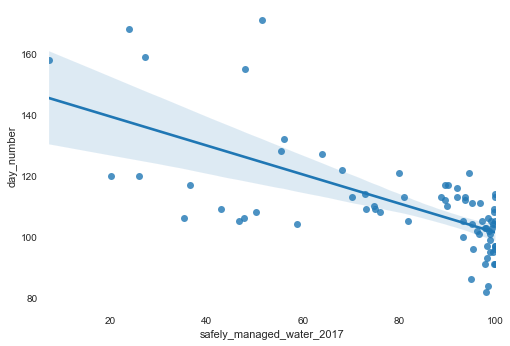

In [22]:
sns.regplot(data= down_data_bycorr, x='safely_managed_water_2017', y = 'day_number');

Another of our stongest relations has more data, but largely countries have 90%+ safely managed water, so the predictive qualities for countries with lower percentages will not be as good.  We can see that the data with lower percentages also have a much larger variation.  Thus there are other predictive factors at play.

#### 3.5.2.1 Imputing Predictive Variables<a id='3.5.2.1_Imputing'></a>

We began to reduce narrow down our predictive variables above by removing those varaibles with a correlation coefficient less than 0.25.  Of the remaining variables there are several with many null values.  

In [23]:
down_data_bycorr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  121 non-null    object 
 1   adult_anemia_2016                        121 non-null    float64
 2   adult_blood_pressure_2015                121 non-null    float64
 3   adult_sodium_2017                        121 non-null    float64
 4   basic_sanitation_2017                    120 non-null    float64
 5   basic_water_2017                         120 non-null    float64
 6   fruit_veg_availability_2013              116 non-null    float64
 7   government_revenue_2020                  39 non-null     float64
 8   limited_sanitation_2017                  120 non-null    float64
 9   limited_water_2017                       120 non-null    float64
 10  nurses_and_midwives_2016                 16 non-nu

Interestingly, there are some well-correlated variables with few values.  This raises the question of can we trust these values since they do not represent all of the data? Can we, and should we, impute the values?  

Let's consider imputing methods:

For our continuous variables, the most common method for imputing data is to use mean and median imputation. However, this would be unhelpful for us to blindly fill these metrics due to the variance expected.  Thus, a regression model for the missing variables can help us and predict at the same time.  

For our categorical variable, imputing with the mode is generally used. But in this case, based on the data we do have, there are class imbalances.  Imputing with the mode would exaserbate this issue so a classification model could be used to predict the missing classes.

To perform these predictive imputations, we will want to consider a variable that each of the datum that needs imputing will be related to.  

Let's start with identifying null values and imputing for columns with minimal missing data.

In [24]:
null_columns=down_data_bycorr.columns[down_data_bycorr.isnull().any()]
down_data_bycorr[down_data_bycorr.isnull().any(axis=1)][null_columns].head()

basic_sanitation_2017  basic_water_2017  fruit_veg_availability_2013  \
0                  43.42             67.06                       172.67   
1                  49.88             55.84                       432.87   
2                    NaN               NaN                       398.31   
3                  24.35             99.97                       523.27   
4                   3.23              1.09                       706.40   

   government_revenue_2020  limited_sanitation_2017  limited_water_2017  \
0                    1.425                     9.82                3.17   
1                      NaN                    20.20                9.98   
2                      NaN                      NaN                 NaN   
3                      NaN                     0.00                0.00   
4                      NaN                     0.00                0.00   

   nurses_and_midwives_2016  open_defecation_2017  physicians_2016  \
0                       NaN                 12.74             0.30   
1                       NaN                 19.92              NaN   
2                       NaN                   NaN              NaN   
3                     12.57                  0.00              NaN   
4                       NaN                  0.00             5.23   

   safely_managed_sanitation_2017  safely_managed_water_2017  \
0                             NaN                        NaN   
1                             NaN                        NaN   
2                             NaN                        NaN   
3                           75.64                        NaN   
4                           96.75                      98.91   

   surface_water_2017  undernourishment_prev_2017  unimproved_sanitation_2017  \
0               10.88                        29.8                       34.02   
1               15.39                        25.0                       10.00   
2                 NaN                         4.6                         NaN   
3                0.00                         2.5                        0.01   
4                0.00                         2.5                        0.03   

   unimproved_water_2017  economic_rating  macroeconomic_rating  
0                  18.88              3.0                   3.5  
1                  18.80              NaN                   NaN  
2                    NaN              NaN                   NaN  
3                   0.03              NaN                   NaN  
4                   0.00              NaN                   NaN

Then let's sort the data by something that each of these variables is linearly correlated with, day_number.

In [25]:
df = down_data_bycorr.sort_values(by = 'day_number')
df.head(10)

country  adult_anemia_2016  adult_blood_pressure_2015  \
93    S. Korea          23.700000                     10.980   
51       Japan          25.600000                     17.550   
49       Italy          19.666667                     21.170   
36     Germany          18.566667                     19.875   
33      France          20.333333                     22.050   
97   Singapore          25.333333                     14.590   
101      Spain          19.166667                     19.105   
10     Belgium          18.566667                     17.480   
116        USA          14.233333                     12.925   
113         UK          17.433333                     15.160   

     adult_sodium_2017  basic_sanitation_2017  basic_water_2017  \
93            5.203333                   0.10              1.57   
51            5.766667                   1.13              0.56   
49            4.050000                   2.56              4.40   
36            3.810000                   1.99              0.20   
33            3.813333                  10.28              2.15   
97            6.470000                   0.00              0.00   
101           3.896667                   3.28              1.48   
10            3.473333                   2.39              0.48   
116           5.113333                  10.00              0.27   
113           3.476667                   1.36              0.01   

     fruit_veg_availability_2013  government_revenue_2020  \
93                        747.25                      NaN   
51                        425.05                      NaN   
49                        736.07                      NaN   
36                        496.91                      NaN   
33                        579.88                      NaN   
97                           NaN                      NaN   
101                       524.32                      NaN   
10                        569.27                      NaN   
116                       598.59                      NaN   
113                       614.79                      NaN   

     limited_sanitation_2017  limited_water_2017  ...  \
93                      0.00                 0.0  ...   
51                      0.00                 0.0  ...   
49                      0.10                 0.0  ...   
36                      0.77                 0.0  ...   
33                      1.35                 0.0  ...   
97                      0.00                 0.0  ...   
101                     0.08                 0.0  ...   
10                      0.51                 0.0  ...   
116                     0.00                 0.0  ...   
113                     0.72                 0.0  ...   

     unimproved_sanitation_2017  unimproved_water_2017  \
93                         0.00                   0.21   
51                         0.11                   0.99   
49                         1.13                   0.56   
36                         0.00                   0.00   
33                         0.00                   0.00   
97                         0.00                   0.00   
101                        0.02                   0.07   
10                         0.00                   0.00   
116                        0.03                   0.73   
113                        0.17                   0.00   

     workplaces_percent_change_from_baseline  parkinson_disease_deaths  \
93                                 -6.486413               3224.604757   
51                                -13.006793              15161.514382   
49                                -32.841150               7608.794566   
36                                -21.465793              12619.472416   
33                                -32.442342               7622.824664   
97                                -34.315217                176.453869   
101                               -33.026139               5829.586649   
10                               

Finally we can impute values. 

In [26]:
df.interpolate(method='linear', limit_direction = 'both', inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 93 to 11
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  121 non-null    object 
 1   adult_anemia_2016                        121 non-null    float64
 2   adult_blood_pressure_2015                121 non-null    float64
 3   adult_sodium_2017                        121 non-null    float64
 4   basic_sanitation_2017                    121 non-null    float64
 5   basic_water_2017                         121 non-null    float64
 6   fruit_veg_availability_2013              121 non-null    float64
 7   government_revenue_2020                  121 non-null    float64
 8   limited_sanitation_2017                  121 non-null    float64
 9   limited_water_2017                       121 non-null    float64
 10  nurses_and_midwives_2016                 121 non-n

### 3.5.3 Visualizing High Dimensional Data<a id='3.5.3_Visualizing_High_Dimensional_Data'></a>

We have determined some potentially relevant features for the prediction of the day when 100 cases of COVID occur.  However, we still have some concerns about if our predictive variables can tell us what we need to know.  

We will utilize principle component analysis to find linear combinations of our features that are uncorrelated with one another and order them by the amount of variance they explain.  We can use these derived features to visualize the data in a lower dimension and know how much variance the representation explains. We can also explore how the original features contribute to these derived features.

#### 3.5.3.1 Scale the data<a id='3.5.3.1_Scale_the_data'></a>

We will procede with just the numeric data, setting country as an index.

In [28]:
df_scale = df.set_index('country')

df_index = df_scale.index
df_columns = df_scale.columns

df_scale.head()

adult_anemia_2016  adult_blood_pressure_2015  adult_sodium_2017  \
country                                                                     
S. Korea          23.700000                     10.980           5.203333   
Japan             25.600000                     17.550           5.766667   
Italy             19.666667                     21.170           4.050000   
Germany           18.566667                     19.875           3.810000   
France            20.333333                     22.050           3.813333   

          basic_sanitation_2017  basic_water_2017  \
country                                             
S. Korea                   0.10              1.57   
Japan                      1.13              0.56   
Italy                      2.56              4.40   
Germany                    1.99              0.20   
France                    10.28              2.15   

          fruit_veg_availability_2013  government_revenue_2020  \
country                                                          
S. Korea                       747.25                    38.14   
Japan                          425.05                    38.14   
Italy                          736.07                    38.14   
Germany                        496.91                    38.14   
France                         579.88                    38.14   

          limited_sanitation_2017  limited_water_2017  \
country                                                 
S. Korea                     0.00                 0.0   
Japan                        0.00                 0.0   
Italy                        0.10                 0.0   
Germany                      0.77                 0.0   
France                       1.35                 0.0   

          nurses_and_midwives_2016  ...  unimproved_sanitation_2017  \
country                             ...                               
S. Korea                  6.900000  ...                        0.00   
Japan                     6.310000  ...                        0.11   
Italy                     5.720000  ...                        1.13   
Germany                   6.186667  ...                        0.00   
France                    6.653333  ...                        0.00   

          unimproved_water_2017  workplaces_percent_change_from_baseline  \
country                                                                    
S. Korea                   0.21                                -6.486413   
Japan                      0.99                               -13.006793   
Italy                      0.56                               -32.841150   
Germany                    0.00                               -21.465793   
France                     0.00                               -32.442342   

          parkinson_disease_deaths  dementia_deaths  cancers_deaths  \
country                                                               
S. Korea               3224.604757     29798.685258    89670.950054   
Japan                 15161.514382    190560.882432   408392.273177   
Italy                  7608.794566     72574.526515   182277.862996   
Germany               12619.472416     83603.200360   250892.527601   
France                 7622.824664     68727.644036   180571.724245   

          economic_rating  macroeconomic_rating  cases_per_cap  day_number  
country                                                                     
S. Korea         3.166667                   3.5      35.620943          82  
Japan            3.166667                   3.5      49.931240          84  
Italy            3.166667                   3.5     432.064137          86  
Germany          3.166667                   3.5     283.413813          91  
France           3.166667                   3.5     380.052114          91  

[5 rows x 26 columns]

We now have the country as an index and all of the columns are numeric.  

Now we can scale the data.

In [29]:
df_scale = scale(df_scale)
df_scale

array([[-5.16637270e-01, -2.70224227e+00,  1.83010278e+00, ...,
        -3.83177459e-01, -6.33053328e-01, -1.28574402e+00],
       [-3.49873230e-01, -1.32892701e+00,  2.58842119e+00, ...,
        -3.83177459e-01, -6.10236623e-01, -1.22139034e+00],
       [-8.70645145e-01, -5.72244926e-01,  2.77569235e-01, ...,
        -3.83177459e-01, -9.54117526e-04, -1.15703666e+00],
       ...,
       [-5.86853708e-01,  8.61939008e-02, -1.45444796e+00, ...,
        -1.71877955e+00, -5.98874221e-01,  3.28336741e+00],
       [ 8.37954847e-01,  3.26576330e-01, -7.36513369e-01, ...,
        -1.52797925e+00, -6.82402022e-01,  3.99125791e+00],
       [-7.03881105e-01, -2.53476923e-01, -1.60700906e+00, ...,
        -1.52797925e+00, -3.97907291e-01,  4.11996528e+00]])

Note, `scale()` returns an ndarray, so the column names are lost, however, we saved them previously so we can reconstruct a scaled ndarray and column names.

In [30]:
df_scale = pd.DataFrame(df_scale, columns = df_columns)
df_scale.head()


adult_anemia_2016  adult_blood_pressure_2015  adult_sodium_2017  \
0          -0.516637                  -2.702242           1.830103   
1          -0.349873                  -1.328927           2.588421   
2          -0.870645                  -0.572245           0.277569   
3          -0.967193                  -0.842936          -0.045501   
4          -0.812131                  -0.388300          -0.041014   

   basic_sanitation_2017  basic_water_2017  fruit_veg_availability_2013  \
0              -1.162195         -1.019922                     1.184194   
1              -1.130637         -1.046930                    -0.283090   
2              -1.086823         -0.944246                     1.133280   
3              -1.104287         -1.056557                     0.044157   
4              -0.850289         -1.004413                     0.421999   

   government_revenue_2020  limited_sanitation_2017  limited_water_2017  \
0                 1.016098                -0.772001           -0.544474   
1                 1.016098                -0.772001           -0.544474   
2                 1.016098                -0.760498           -0.544474   
3                 1.016098                -0.683432           -0.544474   
4                 1.016098                -0.616718           -0.544474   

   nurses_and_midwives_2016  ...  unimproved_sanitation_2017  \
0                  0.616354  ...                   -0.570211   
1                  0.449874  ...                   -0.561618   
2                  0.283394  ...                   -0.481941   
3                  0.415073  ...                   -0.570211   
4                  0.546752  ...                   -0.570211   

   unimproved_water_2017  workplaces_percent_change_from_baseline  \
0              -0.604329                                 1.476260   
1              -0.490463                                 0.863957   
2              -0.553235                                -0.998609   
3              -0.634985                                 0.069606   
4              -0.634985                                -0.961158   

   parkinson_disease_deaths  dementia_deaths  cancers_deaths  economic_rating  \
0                  0.254594         0.416154        0.330832         -0.55003   
1                  2.698615         4.959764        3.074822         -0.55003   
2                  1.152235         1.625124        1.128119         -0.55003   
3                  2.178145         1.936827        1.718848         -0.55003   
4                  1.155107         1.516400        1.113430         -0.55003   

   macroeconomic_rating  cases_per_cap  day_number  
0             -0.383177      -0.633053   -1.285744  
1             -0.383177      -0.610237   -1.221390  
2             -0.383177      -0.000954   -1.157037  
3             -0.383177      -0.237966   -0.996152  
4             -0.383177      -0.083883   -0.996152  

[5 rows x 26 columns]

##### 3.5.3.1.1 Verifying the scaling<a id='3.5.3.1.1_Verifying_the_scaling'></a>

Check the mean and standard deviation to ensure we performed the scaling correctly.  We'd expect the mean to be zero and the standard deviation to be 1. 

In [31]:
df_scale.mean()

adult_anemia_2016                          3.110460e-16
adult_blood_pressure_2015                 -7.601816e-16
adult_sodium_2017                          4.881311e-16
basic_sanitation_2017                      2.477357e-16
basic_water_2017                           7.890841e-17
fruit_veg_availability_2013               -1.321257e-16
government_revenue_2020                   -4.037175e-17
limited_sanitation_2017                   -1.449713e-16
limited_water_2017                         2.192920e-16
nurses_and_midwives_2016                   3.303143e-17
open_defecation_2017                      -1.825904e-16
physicians_2016                            3.541703e-16
safely_managed_sanitation_2017             3.853667e-16
safely_managed_water_2017                 -1.045995e-16
surface_water_2017                         2.358077e-16
undernourishment_prev_2017                -7.638518e-17
unimproved_sanitation_2017                -1.789202e-17
unimproved_water_2017                      3.853

In [32]:
df_scale.std(ddof=0) #ddof=0 since this is how scale calculates

adult_anemia_2016                          1.0
adult_blood_pressure_2015                  1.0
adult_sodium_2017                          1.0
basic_sanitation_2017                      1.0
basic_water_2017                           1.0
fruit_veg_availability_2013                1.0
government_revenue_2020                    1.0
limited_sanitation_2017                    1.0
limited_water_2017                         1.0
nurses_and_midwives_2016                   1.0
open_defecation_2017                       1.0
physicians_2016                            1.0
safely_managed_sanitation_2017             1.0
safely_managed_water_2017                  1.0
surface_water_2017                         1.0
undernourishment_prev_2017                 1.0
unimproved_sanitation_2017                 1.0
unimproved_water_2017                      1.0
workplaces_percent_change_from_baseline    1.0
parkinson_disease_deaths                   1.0
dementia_deaths                            1.0
cancers_death

As expected, df_scale has a mean of (very, very close to) zero and a standard deviation of 1. 


#### 3.5.3.2 Calculate the PCA transformation<a id='3.5.3.2_Calculate_the_PCA_transformation'></a>

Implement the PCA transformation and plot the cumulative variance ratio using the scaled data.

In [33]:
df_pca = PCA().fit(df_scale)

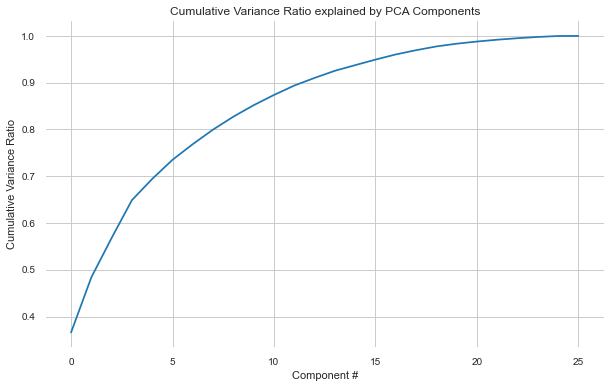

In [34]:
plt.subplots(figsize=(10, 6))
plt.plot(df_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Cumulative Variance Ratio explained by PCA Components')
plt.grid(True);

The first two components account for ~50% of the variance and the first five account for ~75%.  


Apply the transformation to the data to obtain the derived features.

In [35]:
df_pca_x = df_pca.transform(df_scale)
df_pca_x.shape

(121, 26)

Plot the first two derived features (the first two principle components) and label each point with the name of the country.

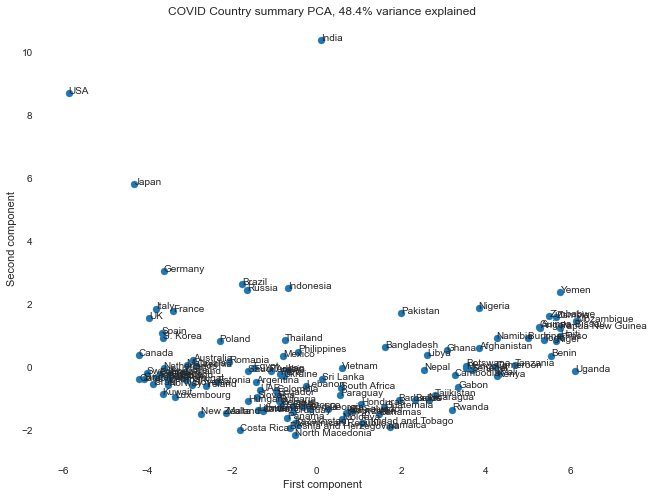

In [36]:
x = df_pca_x[:, 0]
y = df_pca_x[:, 1]
country = df_index
pc_var = 100 * df_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'COVID Country summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(country, x, y):
    plt.annotate(s, (x, y))

#### 3.5.3.3 Adding day_number to scatter plot<a id='3.5.3.4_Adding_day_number_to_scatter_plot'></a>

Create a df with first two principle components, indexes, column names, and day_number to keep track of items of interest.

In [37]:
pca_df = pd.DataFrame({'PC1': df_pca_x[:,0], 'PC2': df_pca_x[:,1]}, index=df_index)
pca_df.head()

PC1       PC2
country                     
S. Korea -3.628301  0.905860
Japan    -4.304646  5.789050
Italy    -3.802282  1.844339
Germany  -3.605475  3.021842
France   -3.386022  1.759185

In [38]:
# our average state prices also have state as an index
day_num = data[['country','day_number']]
day_num = day_num.set_index('country')
day_num.head()

day_number
country                
Afghanistan         118
Angola              193
Argentina           111
Australia           101
Austria              99

In [39]:
pca_df = pd.concat([pca_df, day_num], axis=1)
pca_df.head()

PC1       PC2  day_number
S. Korea -3.628301  0.905860          82
Japan    -4.304646  5.789050          84
Italy    -3.802282  1.844339          86
Germany  -3.605475  3.021842          91
France   -3.386022  1.759185          91

There is some range in the day_number.  To quantify this, we'll determine the quantile and add a categorical column to seperate day_number into ranges.


In [40]:
pca_df['Quartile'] = pd.qcut(pca_df.day_number, q=4, precision=1)
pca_df.head()

PC1       PC2  day_number       Quartile
S. Korea -3.628301  0.905860          82  (81.9, 105.0]
Japan    -4.304646  5.789050          84  (81.9, 105.0]
Italy    -3.802282  1.844339          86  (81.9, 105.0]
Germany  -3.605475  3.021842          91  (81.9, 105.0]
France   -3.386022  1.759185          91  (81.9, 105.0]

Double check the data to ensure it is all populated

In [41]:
pca_df[pca_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [PC1, PC2, day_number, Quartile]
Index: []

We can now recreate the scatterplot, adding marker size for day_number and colour for the discrete quartile.

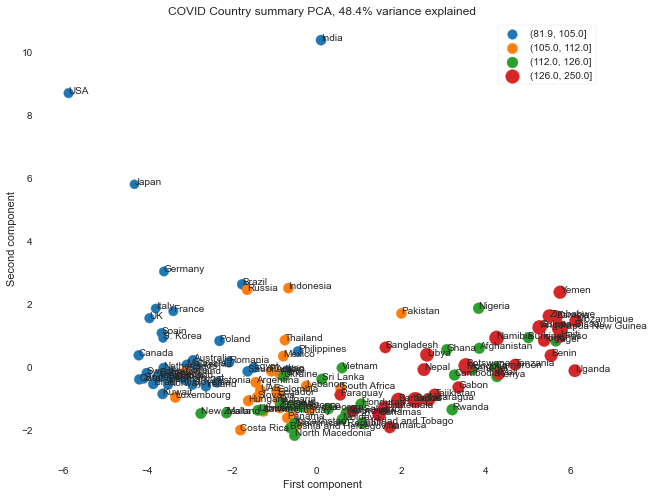

In [42]:
x = pca_df.PC1
y = pca_df.PC2
day = pca_df.day_number
quartiles = pca_df.Quartile
country = pca_df.index
pc_var = 100 * df_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=day[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
plt.title(f'COVID Country summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(country, x, y):
    plt.annotate(s, (x, y))

From the above plot we can see the distribution of countries as in our first scatter plot. We also have the additional information about the day_number.  There do appear to be some groupings.  The blue points of the lower quartile and the red points of the upper quartile of day_number show a linear pattern between the first and second components.  While more grouped, the mid-quartile groupings (yellow and green) also show some pattern.  



In [43]:
pca_df['Quartile'] = pd.qcut(pca_df.day_number, q=2, precision=1)
pca_df.head()

PC1       PC2  day_number       Quartile
S. Korea -3.628301  0.905860          82  (81.9, 112.0]
Japan    -4.304646  5.789050          84  (81.9, 112.0]
Italy    -3.802282  1.844339          86  (81.9, 112.0]
Germany  -3.605475  3.021842          91  (81.9, 112.0]
France   -3.386022  1.759185          91  (81.9, 112.0]

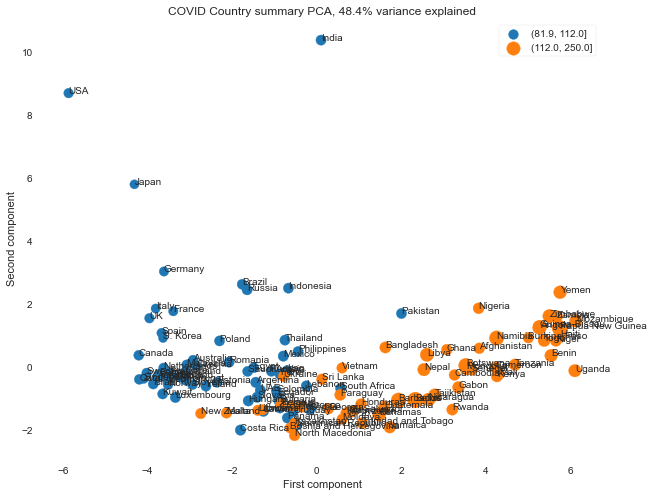

In [44]:
x = pca_df.PC1
y = pca_df.PC2
day = pca_df.day_number
quartiles = pca_df.Quartile
country = pca_df.index
pc_var = 100 * df_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=day[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
plt.title(f'COVID Country summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(country, x, y):
    plt.annotate(s, (x, y))

Duplicating this plot again with only two quartile categories shows a clear linearity between the two groups.  


In the first two components, there is a spread of countries across the first component.  India definately looks to be off on its own a bit.  North Macedonia is also possibly an extreme value.  Both of these values are around the same local on the First Component, but at opposite extremes for the Second Component.  

Using the components_ attribute of the fitted PCA, we can tell how important each feature's contributions are to the coordinate on the plot.  

In [45]:
pd.DataFrame(df_pca.components_, columns=df_columns)

adult_anemia_2016  adult_blood_pressure_2015  adult_sodium_2017  \
0            0.223990                   0.195410          -0.204036   
1            0.129254                  -0.044631           0.047317   
2           -0.080025                  -0.036033           0.047468   
3           -0.112737                  -0.147340           0.012261   
4           -0.251406                  -0.252841          -0.142405   
5            0.107073                   0.387111           0.486682   
6            0.389432                   0.151620           0.303391   
7           -0.043707                   0.314166           0.034364   
8            0.230831                  -0.007648          -0.014501   
9           -0.107310                  -0.085775           0.298742   
10           0.076036                  -0.078986           0.259093   
11          -0.087870                  -0.585078           0.396561   
12           0.283171                  -0.054108           0.004951   
13           0.197487                   0.063324           0.021796   
14          -0.129088                   0.206536           0.006045   
15          -0.394874                   0.182690          -0.018210   
16           0.197084                  -0.234777           0.055477   
17           0.025094                  -0.192409          -0.100043   
18          -0.338096                   0.120130           0.488172   
19           0.201651                  -0.100197          -0.000705   
20           0.276598                  -0.095169           0.166600   
21          -0.168603                   0.166910           0.014883   
22          -0.103096                  -0.016520           0.019501   
23           0.075109                   0.070248          -0.080309   
24          -0.004216                  -0.056522           0.047137   
25          -0.005285                  -0.021703          -0.014793   

    basic_sanitation_2017  basic_water_2017  fruit_veg_availability_2013  \
0                0.110786          0.185262                    -0.175034   
1               -0.150636          0.032011                    -0.125544   
2                0.472458          0.250835                     0.046903   
3                0.249796          0.216932                     0.064538   
4               -0.040012         -0.094530                     0.284716   
5                0.061536         -0.123995                    -0.272469   
6                0.167697         -0.038605                     0.133340   
7               -0.013572         -0.454652                     0.461483   
8                0.154470          0.371655                     0.396904   
9                0.043825         -0.141927                    -0.346842   
10              -0.197967         -0.187759                     0.276314   
11               0.104134         -0.125875                     0.012135   
12              -0.146575          0.149514                     0.022759   
13               0.227007         -0.103700                     0.044838   
14               0.228763          0.095441                     0.079236   
15               0.173379         -0.012114                    -0.292568   
16               0.058993          0.230599                    -0.133440   
17               0.393007         -0.339802                    -0.048092   
18              -0.133191          0.397646                     0.254201   
19               0.109062         -0.166790                     0.051613   
20               0.141804         -0.005519                    -0.041582   
21               0.212733          0.029327                     0.081739   
22               0.313518         -0.106644                     0.091078   
23               0.071375         -0.023121                     0.046056   
24              -0.240817          0.054668                    -0.078918   
25              -0.013677         -0.008038                    -0.000476   

    government_revenue_2020  limi

We do not have any huge values for any components, which makes sense given what we saw in our plot. Also, there are interspersed pos/neg values in all of the columns.   

In [46]:
df[df.country.isin(['India', 'North Macedonia'])].T

44               78
country                                    India  North Macedonia
adult_anemia_2016                             51          24.8333
adult_blood_pressure_2015                 25.665           28.395
adult_sodium_2017                        3.96667             4.45
basic_sanitation_2017                      59.54            82.57
basic_water_2017                           92.67            12.13
fruit_veg_availability_2013               397.44           825.42
government_revenue_2020                  32.6225          25.5587
limited_sanitation_2017                     12.5             0.17
limited_water_2017                          0.76             6.26
nurses_and_midwives_2016                    2.09             1.29
open_defecation_2017                       25.73             0.68
physicians_2016                             0.76             0.93
safely_managed_sanitation_2017             41.68            16.56
safely_managed_water_2017                  40.98            81.01
surface_water_2017                          0.75                0
undernourishment_prev_2017                  14.5              3.2
unimproved_sanitation_2017                  2.22             0.02
unimproved_water_2017                       5.81              0.6
workplaces_percent_change_from_baseline -22.7165         -27.4348
parkinson_disease_deaths                   38924           136.05
dementia_deaths                           171544          810.303
cancers_deaths                            895371          4293.27
economic_rating                          3.16667          3.97396
macroeconomic_rating                         3.5          4.46875
cases_per_cap                            234.035          662.343
day_number                                   105              113

In [47]:
df[df.country.isin(['Thailand', 'Bangladesh'])].T

107         7  
country                                  Thailand  Bangladesh
adult_anemia_2016                         34.5333     41.7333
adult_blood_pressure_2015                  22.285       24.74
adult_sodium_2017                         4.69667     4.68333
basic_sanitation_2017                       98.75       48.23
basic_water_2017                            99.93       41.57
fruit_veg_availability_2013                423.77      138.83
government_revenue_2020                    68.125      15.565
limited_sanitation_2017                      1.19       22.65
limited_water_2017                           0.07        1.54
nurses_and_midwives_2016                    2.718     2.19211
open_defecation_2017                            0           0
physicians_2016                              1.84       0.377
safely_managed_sanitation_2017            40.3267       48.53
safely_managed_water_2017                   64.68       55.44
surface_water_2017                              0        0.93
undernourishment_prev_2017                    7.8        14.7
unimproved_sanitation_2017                   0.06       29.12
unimproved_water_2017                           0        0.51
workplaces_percent_change_from_baseline  -17.3098    -24.6196
parkinson_disease_deaths                  3472.18     3162.12
dementia_deaths                           29408.4     15996.9
cancers_deaths                            98624.7     95092.3
economic_rating                           3.21875     3.66667
macroeconomic_rating                       3.5625         3.5
cases_per_cap                             4.87348     181.663
day_number                                    106         128

Above we can see that adult anemia is particularly high for India and particularly low for North Macedonia.  Thailand and Bangladesh both have approaching median values and this is represented on the plot.  


### 3.5.4 Visualizing Highest Impact Coefficients <a id='3.5.4_Coefficients'></a>

To identify/confirm our most important features for predicting day_number, we can look at the Lasso regressor

[-0.00000000e+00  0.00000000e+00 -2.93938971e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -3.15790158e-01  0.00000000e+00
  0.00000000e+00 -9.47067473e-01  0.00000000e+00 -3.07095844e+00
 -7.15081119e-02 -0.00000000e+00  7.66956688e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.94969891e-06 -0.00000000e+00 -1.85649331e+01
 -0.00000000e+00]


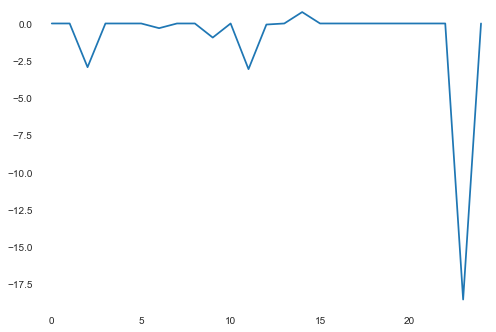

In [73]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)
X = df.drop(labels = ['country','day_number'], axis=1)
# X = df[['adult_anemia_2016']]
y = df[['day_number']] 

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(lasso_coef)
#plt.plot(range(len(df)), lasso_coef)
#plt.xticks(range(len(X)), X.values, rotation=60)
plt.margins(0.02)
plt.show()

In [81]:
las_info = pd.DataFrame(X.columns, columns = ['feature'])
las_info['lasso_coef'] = lasso_coef

las_info

feature  lasso_coef
0                         adult_anemia_2016   -0.000000
1                 adult_blood_pressure_2015    0.000000
2                         adult_sodium_2017   -2.939390
3                     basic_sanitation_2017    0.000000
4                          basic_water_2017    0.000000
5               fruit_veg_availability_2013   -0.000000
6                   government_revenue_2020   -0.315790
7                   limited_sanitation_2017    0.000000
8                        limited_water_2017    0.000000
9                  nurses_and_midwives_2016   -0.947067
10                     open_defecation_2017    0.000000
11                          physicians_2016   -3.070958
12           safely_managed_sanitation_2017   -0.071508
13                safely_managed_water_2017   -0.000000
14                       surface_water_2017    0.766957
15               undernourishment_prev_2017    0.000000
16               unimproved_sanitation_2017    0.000000
17                    unimproved_water_2017    0.000000
18  workplaces_percent_change_from_baseline    0.000000
19                 parkinson_disease_deaths   -0.000000
20                          dementia_deaths   -0.000000
21                           cancers_deaths   -0.000002
22                          economic_rating   -0.000000
23                     macroeconomic_rating  -18.564933
24                            cases_per_cap   -0.000000

The above gives us great information on where to start making our model.    

## 3.6 Summary<a id='3.6_Summary'></a>

Above we have completed exploratory data analysis for COVID related features.  

In this analysis, we have determined a subset of features with which we can predict day_number (the day on which 100 cases is reached) based on the correlation of the datum.  We also imputed any missing values for those variables determined to be correlated with day_number.

We have created multi-dimensional visualizations to gain a better understanding of our data and its distribution.  

Using PCA, we determined the variance in this dataset is explained 48% by the first two variables and incremental explanation increases with more variables. 

Finally, we determined which variables would be best suited to start with for creating a predictive model.  

It would be of interest to repeat this study with a day where covid cases reached 10,000 or 100,000 to determine if this gives us alternate correlations for reasons such as mobility reduction strategies would have been adopted at such a time or sanitation would have more of an impact of the spread of the disease.  

A sample of the dataset is provided below.  

In [75]:
df.sample(10).T

103       93       117      11   \
country                                   Sweden  S. Korea  Vietnam   Belize   
adult_anemia_2016                        17.4667      23.7     28.4  21.5667   
adult_blood_pressure_2015                  19.26     10.98    23.32   22.695   
adult_sodium_2017                        4.61667   5.20333  4.40333     2.65   
basic_sanitation_2017                       5.92       0.1    83.52    87.86   
basic_water_2017                            0.06      1.57    94.72    97.99   
fruit_veg_availability_2013               600.95    747.25   590.51   586.97   
government_revenue_2020                    38.14     38.14   31.475     1.73   
limited_sanitation_2017                      0.7         0     3.76     9.03   
limited_water_2017                             0         0        0     1.24   
nurses_and_midwives_2016                  10.495       6.9     1.43      0.6   
open_defecation_2017                           0         0     2.99     0.78   
physicians_2016                            4.985      2.33     0.82     0.15   
safely_managed_sanitation_2017             93.38      99.9   19.055    26.11   
safely_managed_water_2017                  99.94     98.21   84.925     51.6   
surface_water_2017                             0         0        0        0   
undernourishment_prev_2017                   2.5       2.5      9.3      7.5   
unimproved_sanitation_2017                  0.01         0     9.74     2.33   
unimproved_water_2017                          0      0.21     5.28     0.76   
workplaces_percent_change_from_baseline -27.2695  -6.48641  2.15523 -31.1464   
parkinson_disease_deaths                 1204.08    3224.6  3647.65  10.5799   
dementia_deaths                           9485.2   29798.7  27416.5  61.8784   
cancers_deaths                           23938.8     89671   116632   264.84   
economic_rating                          3.16667   3.16667  3.94792        3   
macroeconomic_rating                         3.5       3.5   4.4375        3   
cases_per_cap                            859.553   35.6209   1.0557  183.101   
day_number                                    97        82      113      250   

                                                  94                83   \
country                                  Saudi Arabia  Papua New Guinea   
adult_anemia_2016                             43.7333           39.1333   
adult_blood_pressure_2015                       22.78             25.47   
adult_sodium_2017                             4.34333           3.29667   
basic_sanitation_2017                           22.25             12.95   
basic_water_2017                                  100             41.33   
fruit_veg_availability_2013                    539.48             522.7   
government_revenue_2020                         38.14              1.73   
limited_sanitation_2017                             0              2.26   
limited_water_2017                                  0              1.71   
nurses_and_midwives_2016                        4.186               0.6   
open_defecation_2017                                0             14.47   
physicians_2016                               3.17619              0.15   
safely_managed_sanitation_2017                  77.75             26.11   
safely_managed_water_2017                       99.58              51.6   
surface_water_2017                                  0             51.45   
undernourishment_prev_2017                        7.1               5.7   
unimproved_sanitation_2017                          0             70.32   
unimproved_water_2017                               0              5.51   
workplaces_percent_change_from_baseline      -26.0392           11.8804   
parkinson_disease_deaths                      465.034           117.316   
dementia_deaths                               3308.02           482.382   
cancers_deaths                                11451.2           5988.38   
econ

In [76]:
data = pd.read_csv('/Users/Hailey/JNote/Capstone2-PredictingCOVID/alldata_cleaned_downselected.csv')


datapath = '/Users/Hailey/JNote/Capstone2-PredictingCOVID'
datapath_csv = os.path.join(datapath, 'data_EDA.csv')
if not os.path.exists(datapath_csv):
    df.to_csv(datapath_csv, index=False)